# Init

In [1]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from main import KMeanManager, find_best_k

23/10/31 17:16:59 WARN Utils: Your hostname, sergey-der resolves to a loopback address: 127.0.1.1; using 192.168.0.105 instead (on interface wlp0s20f3)
23/10/31 17:16:59 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/31 17:17:00 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
/opt/spark/python/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [2]:
spark = (
    SparkSession.builder.master("local[*]")
    .appName("K-mean")
    .getOrCreate()
)
spark.sparkContext.setLogLevel("ERROR")

# Extract data

In [ ]:
from pyspark.sql.functions import monotonically_increasing_id 

data = (
    spark.read.csv('data/data_3.csv', header=True, inferSchema=True, sep=' ')
    .withColumn('person_id', monotonically_increasing_id())
)
params = ['col1', 'col2']
all_params = data.drop('person_id').columns
data.show(truncate=False)

In [ ]:
# data = (
#     spark.read.csv('data/data.csv', header=True, inferSchema=True)
#     .withColumnRenamed('Напряжение углекислого газа (PCO2)', 'person_id')
# )
# params = ['t32', 't33']
# all_params = data.drop('person_id').columns
# data.show(truncate=False)

# Find best K: Silhouette Index

## Silhouette Index for some parameters

In [ ]:
%matplotlib inline
find_best_k(data, 'person_id', params)

As we can see on the picture above, the best value for k is 2, as 2 has the biggest value of Silhouette Score

## Silhouette Index for all parameters

In [ ]:
%matplotlib inline
find_best_k(data, 'person_id', all_params)

As we can see on the picture above, the best value for k is 3, as 3 has the biggest value of Silhouette Score

# KMean clustering

## Clustering with 2D coordinates (k=2) 

In [ ]:
k = 2
k_mean = KMeanManager(data=data, k=k, pk_col_name='person_id')

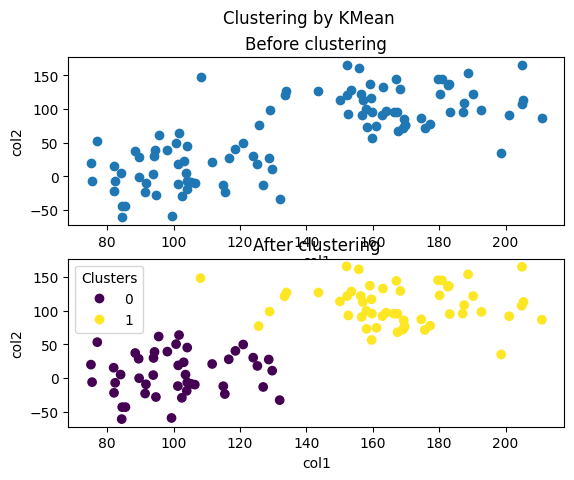

In [7]:
%matplotlib inline
k_mean.clustering('lib', params)
k_mean.show()

### Custom clustering

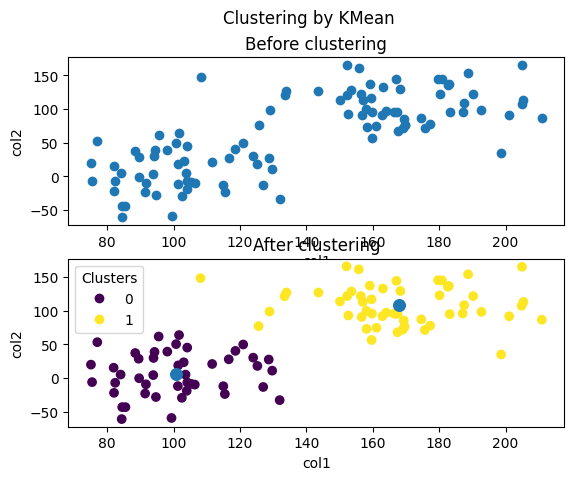

In [8]:
%matplotlib inline
k_mean.clustering('own', params)
k_mean.show(with_centroids=True)

## Clustering with multy coordinates (k=2) 

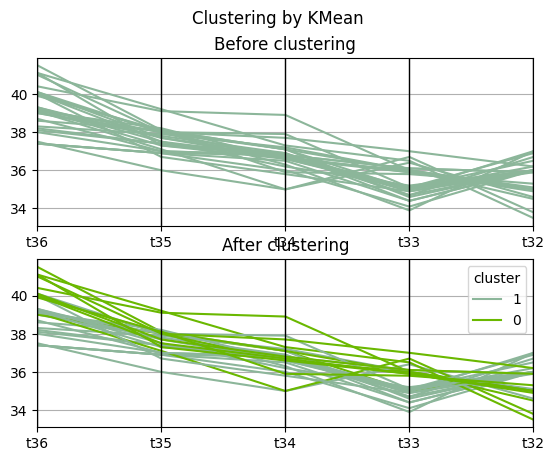

In [30]:
%matplotlib inline
k_mean.clustering('own', all_params)
k_mean.show()

## Clustering with 2D coordinates (k=3) 

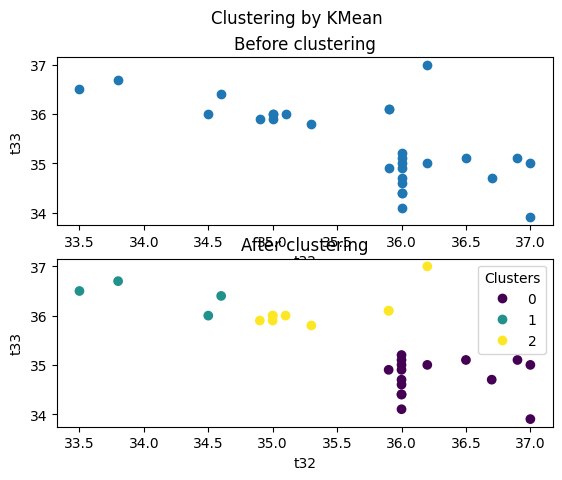

In [33]:
%matplotlib inline
k = 3
k_mean = KMeanManager(data=data, k=k, pk_col_name='person_id')
k_mean.clustering('own', params)
k_mean.show()

## Clustering with multy coordinates (k=3)

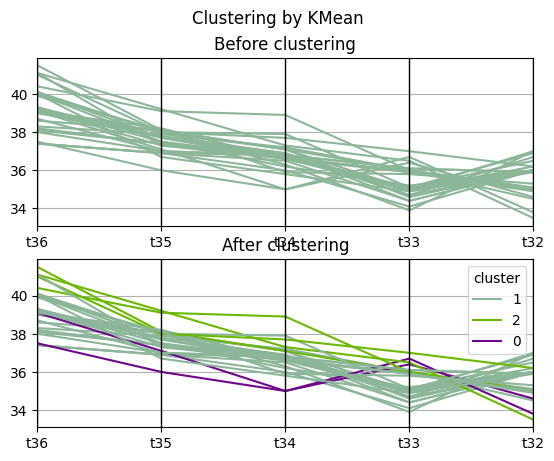

In [34]:
%matplotlib inline
k_mean.clustering('lib', all_params)
k_mean.show()

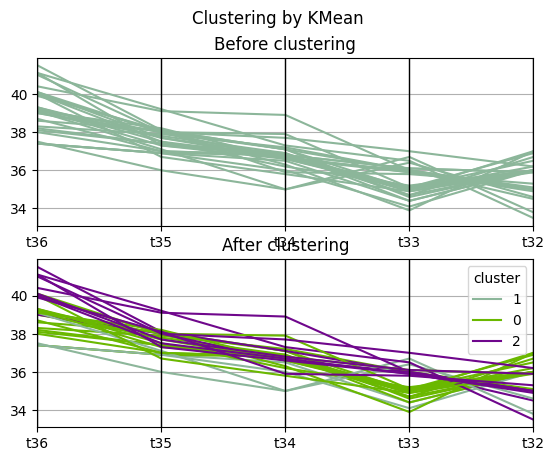

In [36]:
%matplotlib inline
k_mean.clustering('own', all_params)
k_mean.show()

As a result of my analyses I desided that the best value for k is 2 when we are talking about 2D coordinate params and k=3 - multy coordinate params

In [ ]:
spark.stop()